# Clase Tutorial 9: Clustering

## 1. Introducción

* Los algoritmos de clustering agrupan automáticamente grupos de elementos en "clusters".
* Es un problema similar al de clasificación, en donde entrenamos un modelo para identificar regularidades que caracterizan a distintas categorías dentro de los datos. 

    🤔 Entonces... ¿cuál es la diferencia?

    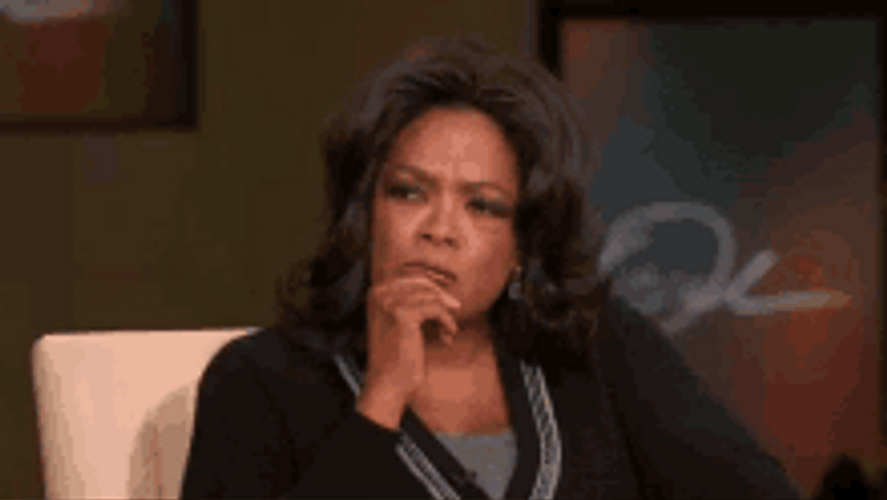

* Clustering es un problema **sin supervisión**.
    * No conocemos *cuál es el grupo* al que pertenece cada dato.
    * No conocemos *cuántos grupos* distintos hay.

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/clustering_classification.png">


* El objetivo de un algoritmo de clustering es que cada cluster sea internamente coherente pero diferente a los demás clusters. 

* Es una técnica que se utiliza más allá del simple agrupamiento de datos, ya que se emplea ampliamente para:
    * Comprender los datos y realizar una exploración inicial.
    * Mejorar los resultados de un modelo predictivo.
    * Optimizar algoritmos.

### **1. k-Means**

- K-means es uno de los algoritmos más famosos para la identificación de clusters, por su simplicidad y eficiencia. 
- En este algoritmo, cada punto en el espacio de las features será asignado a uno de k clusters, en donde k es un hiperparámetro del modelo que se fija a priori. 
- El criterio para agrupar los datos es por su cercanía a ciertos puntos en el espacio llamados centroides. 

En su versión más simple, el algoritmo funciona de la siguiente manera:

1. Se eligen k puntos en el espacio (semillas de cada k-cluster), que serán los centroides iniciales.

2. Se etiqueta cada punto del dataset con el número de centroide más cercano, definiendo así k-clusters.

3. Se redefinen los centroides como los centros geométricos de los puntos dentro de cada cluster. Dicho de otra forma, la posición nueva de cada centroide es el promedio de las posiciones de los puntos asignados al cluster.

4. Se repiten los pasos 2-3 hasta que el algoritmo converge, es decir, hasta que la composición de los clusters no cambia.

De esta manera, el algoritmo busca minimizar una función de costo (J) que es la suma de las distancias al cuadrado de los puntos al centroide de su cluster, o, lo que es lo mismo, la varianza dentro de cada cluster:

\begin{equation}
J=\sum_{j=1}^k \sum_{x \in S_j} \vert\vert x - \mu_j \vert\vert^2
\end{equation}

en donde $\vec{c}_j$ es el centroide del cluster $S_j$.

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/kmeans.gif">

* Podemos observar que los límites de decisión son rectas.

#### k-Means: Problema de inicialización 

- Los puntos k iniciales se pueden inicializar de forma aleatoria, pero es muy sensible a estas semillas iniciales.
    - Dado suficiente tiempo, k-means siempre va a converger. Sin embargo, puede converger a un mínimo local. 
    - Esto depende en gran medida de la inicialización de los centroides. 
- Existen algunos métodos para elegir los puntos iniciales de forma que el problema converga más rápido.
- Por ejemplo, el método de scikit incluye los parámetros:
    - `n_init`: vuelve a ejecutar el algoritmo con n inicializaciones diferentes y devuelve la mejor salida (medida por la suma de cuadrados dentro del cluster).
    - `method`: si se establece como 'kmeans++' (el valor predeterminado), inicializa los centroides para que estén (generalmente) distantes entre sí, lo que probablemente conduzca a resultados mejores que la inicialización aleatoria.

    **¿Cómo funciona k-means++?**
    1. Seleccionar aleatoriamente el primer centroide de los puntos de datos.
    2. Para cada punto de datos, calcular su distancia al centroide previamente seleccionado más cercano.
    3. Seleccionar el próximo centroide de los puntos de datos de manera que la probabilidad de elegir un punto como centroide sea directamente proporcional a su distancia al centroide previamente seleccionado más cercano. (Es decir, el punto que tiene la máxima distancia al centroide más cercano es el más probable de ser seleccionado como próximo centroide)
    4. Repetir los pasos 2 y 3 hasta que se hayan muestreado k centroides.

#### k-Means: Elección de k
- Método del códo
- Silhouette analysis https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

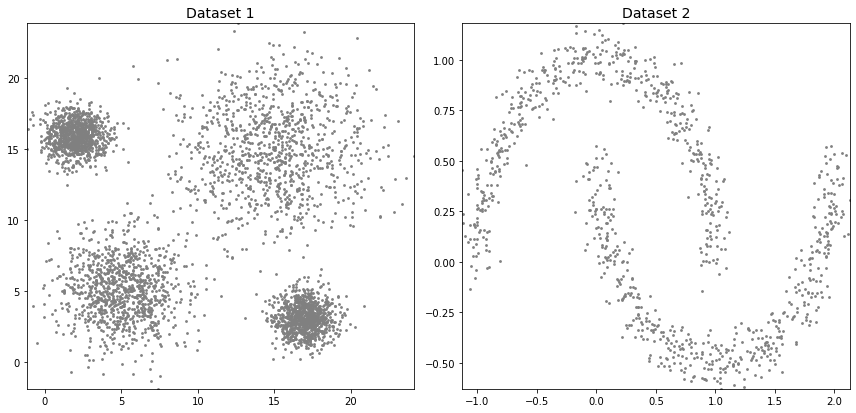

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

np.random.seed(844)
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

dataset2 = datasets.make_moons(n_samples=1000, noise=0.07, random_state=19)[0]

# plot clustering output on the two datasets
def cluster_plots(set1, set2, colours1 = 'gray', colours2 = 'gray', 
                  title1 = 'Dataset 1',  title2 = 'Dataset 2', title_=''):
    fig,(ax1,ax2) = plt.subplots(1, 2)
    fig.suptitle(title_,fontsize=16)
    fig.set_size_inches(12, 6)
    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(set1[:,0]), max(set1[:,0]))
    ax1.set_ylim(min(set1[:,1]), max(set1[:,1]))
    ax1.scatter(set1[:, 0], set1[:, 1],s=8,lw=0,c= colours1)
    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(set2[:,0]), max(set2[:,0]))
    ax2.set_ylim(min(set2[:,1]), max(set2[:,1]))
    ax2.scatter(set2[:, 0], set2[:, 1],s=8,lw=0,c=colours2)
    fig.tight_layout()
    plt.show()

cluster_plots(dataset1, dataset2)

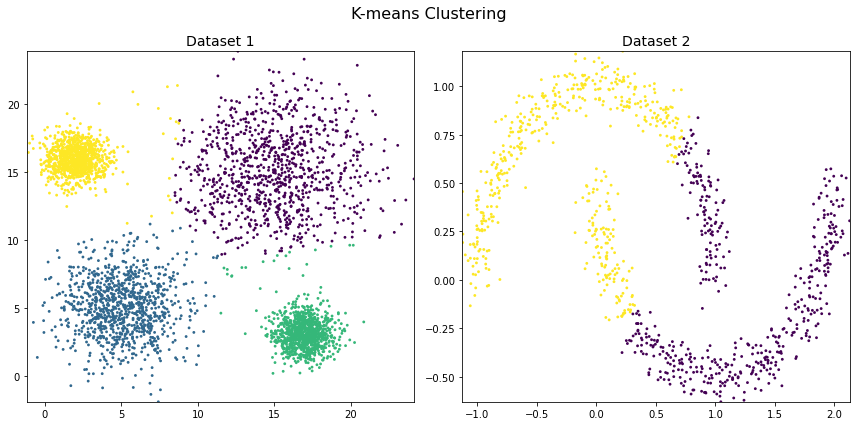

In [12]:
kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=2).fit_predict(dataset1)
kmeans_dataset2 = cluster.KMeans(n_clusters=2, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset2)

cluster_plots(dataset1, dataset2, 
              kmeans_dataset1, kmeans_dataset2, title_= "K-means Clustering")

- Estos dos datasets ilustran las fortalezas y debilidades del k-means. 

- El algoritmo busca e identifica clusters globulares (esencialmente esféricos). 

- Si esta suposición no se cumple, la salida del modelo puede ser inadecuada (o simplemente muy mala). 

- Pero no termina ahí: k-means también puede performar mal con clusters de diferentes tamaños y densidades:

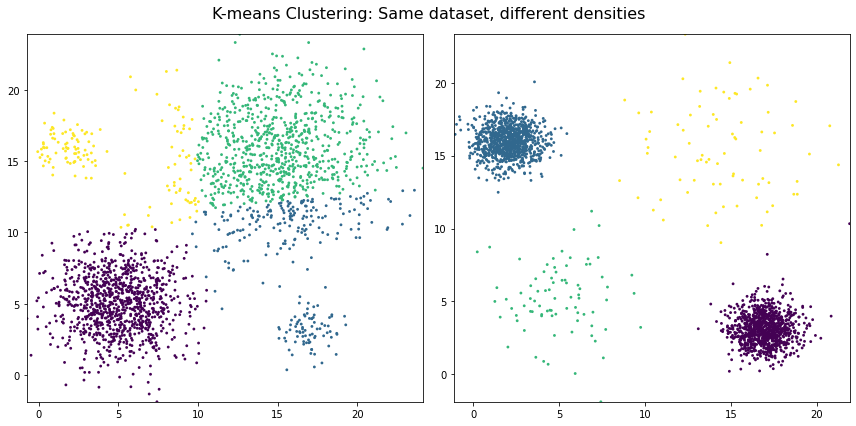

In [14]:
kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(np.vstack([dataset1[:2080,:],
                                                                                    dataset1[3000:3080,:]]))
kmeans_dataset2 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(np.vstack([dataset1[-2080:,],
                                                                                    dataset1[:80,]]))
cluster_plots(np.vstack([dataset1[:2080,],dataset1[3000:3080,]]), 
              np.vstack([dataset1[-2080:,],dataset1[:80,]]), 
              kmeans_dataset1, kmeans_dataset2,title1='', title2='', title_="K-means Clustering: Same dataset, different densities")

#### k-Means: Conclusiones

- A pesar de todas sus fallas, la popularidad perdurable de k-means (y algoritmos relacionados) se debe a su versatilidad. 
- Su complejidad promedio es O(knT), donde k, n y T son el número de clusters, muestras e iteraciones, respectivamente. Por lo tanto, se considera uno de los algoritmos de clustering más rápidos disponibles.

### **2. Expectation Maximization**

- Esta técnica es la aplicación del algoritmo general de Expectation-Maximization (EM) a la tarea de clustering. 
- Está conceptualmente relacionada y es visualmente similar a k-means. 
- Mientras que k-means busca minimizar la distancia entre las observaciones y sus centroides asignados, EM estima algunas variables latentes (típicamente la media y la matriz de covarianza de una distribución normal multinomial (**Modelos de Mezcla Gaussiana (GMM)**) de manera de maximizar la log-verosimilitud de los datos observados. 
- Similar a k-means, el algoritmo converge al clustering final mejorando iterativamente su rendimiento (es decir, reduciendo la log-verosimilitud). 
- Sin embargo, (nuevamente como k-means) no hay garantía de que el algoritmo haya llegado al mínimo global en lugar del mínimo local (una preocupación que aumenta en dimensiones superiores).

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/em_only.gif">


- A diferencia de k-means, las observaciones no se asignan explícitamente a clusters, sino que se les otorgan probabilidades de pertenecer a cada distribución. 
- Si la distribución subyacente se identifica correctamente (por ejemplo, distribución normal en el GIF), entonces el algoritmo funciona bien. 
- En la práctica, especialmente para conjuntos de datos grandes, puede que la distribución subyacente no sea recuperable, por lo que el clustering con EM puede no ser adecuado para tales tareas.

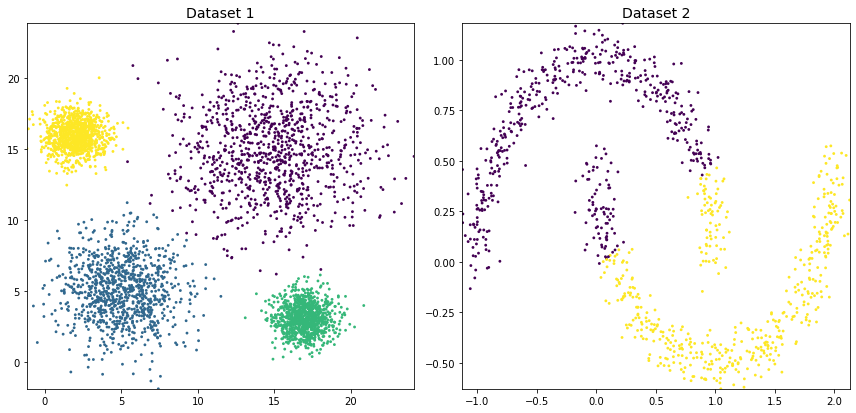

In [17]:
em_dataset1 = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(dataset1)
em_dataset2 = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(dataset2)
cluster_plots(dataset1, dataset2, em_dataset1.predict(dataset1),  em_dataset2.predict(dataset2))

- EM agrupa muy bien al primer dataset porque la data esta normalmente distribuida.
- El dataset 2 no puede ser modelado adecuadamente como una GMM, por lo tanto EM no performa bien.

### **3. Hierarchical Clustering (HC)**

- A diferencia de k-means y EM, el clustering jerárquico (HC) no requiere que el usuario especifique el número de clusters de antemano. 
- En vez, HC devuelve un resultado (generalmente como un dendrograma), a partir del cual el usuario puede decidir el número apropiado de clusters (ya sea manual o algorítmicamente): 
    - Si se hace manualmente, el usuario puede cortar el dendrograma donde los clusters fusionados están demasiado separados (representados por líneas largas en el dendrograma). 
    - Alternativamente, el usuario puede simplemente devolver un número específico de clusters (similar a k-means).

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/hierarch.gif">

- Como su nombre sugiere, construye una jerarquía de clusters basada en la proximidad (por ejemplo, distancia euclidiana o distancia Manhattan).
- HC típicamente viene en dos variantes (básicamente, de abajo hacia arriba o de arriba hacia abajo):
    - Divisivo (HDC): Comienza con el conjunto de datos completo que comprende un solo cluster que se divide iterativamente, un punto a la vez, hasta que cada punto forma su propio cluster.
    - **Aglomerativo** (HAC): El método aglomerativo es en reversa (bottom-up): los puntos individuales se combinan iterativamente hasta que todos los puntos pertenecen al mismo cluster.

- 🤔 ¿Cómo definimos cuales son los clusters más cercanos? 

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/15-Hierarchical-Clustering-Linkages.webp">

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/hierarch_1.gif">

- Otro concepto importante en HC es el criterio de vinculación. Esto define la distancia entre clusters como una función de los puntos en cada cluster y determina qué clusters se fusionan/dividen en cada paso. Esto se ilustra de manera clara en el GIF a continuación:

Dataset 1
Cluster 0: 990
Cluster 1: 1008
Cluster 2: 1002
Cluster 3: 1000


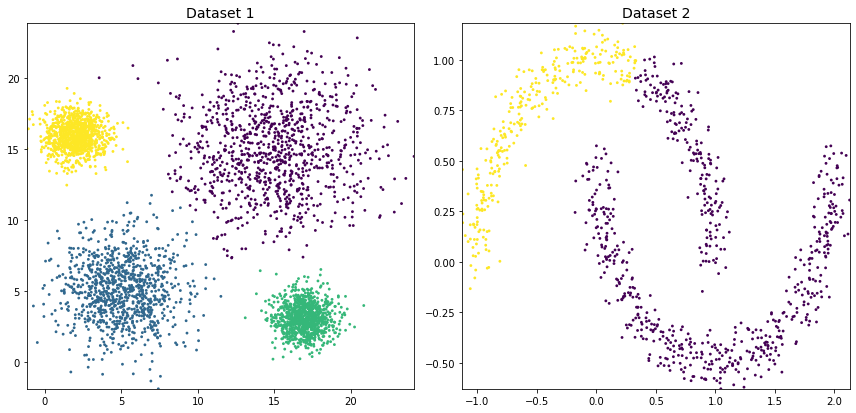

In [21]:
hc_dataset1 = cluster.AgglomerativeClustering(n_clusters=4, metric='euclidean', 
                                              linkage='ward').fit_predict(dataset1)
hc_dataset2 = cluster.AgglomerativeClustering(n_clusters=2, metric='euclidean', 
                                              linkage='ward').fit_predict(dataset2)
#print("Dataset 1")
#print(*["Cluster "+str(i)+": "+ str(sum(hc_dataset1==i)) for i in range(4)], sep='\n')
cluster_plots(dataset1, dataset2, hc_dataset1, hc_dataset2)

Probemos los diferentes tipos de linkage en el dataset 2:
- ‘ward’: minimizes the variance of the clusters being merged.

- ‘average’ uses the average of the distances of each observation of the two sets.

- ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

- ‘single’ uses the minimum of the distances between all observations of the two sets.

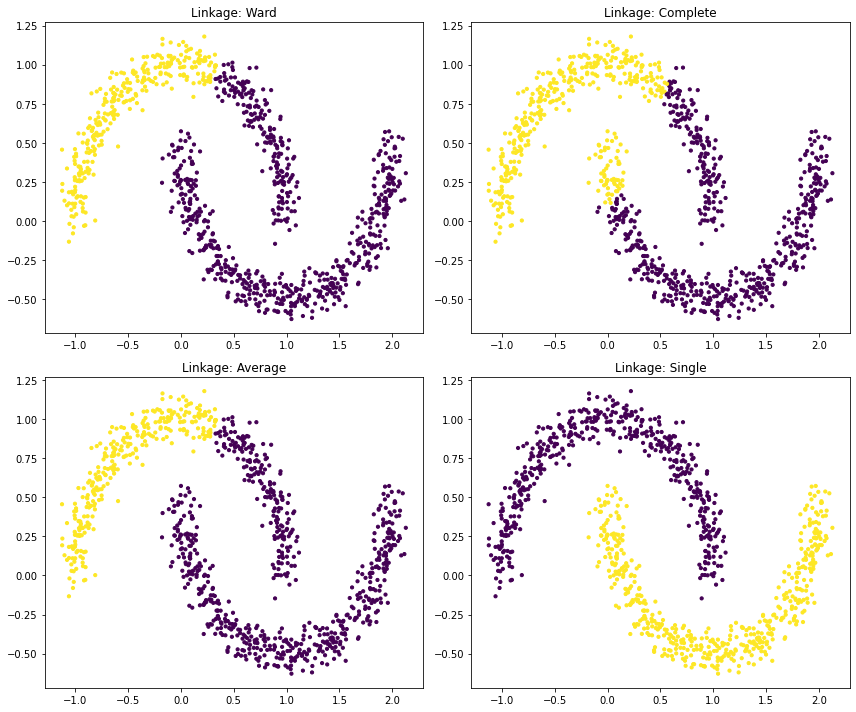

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, linkage_method in enumerate(['ward', 'complete', 'average', 'single']):
    hc_result = cluster.AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage=linkage_method).fit_predict(dataset2)
    ax = axes[i // 2, i % 2]
    ax.scatter(dataset2[:, 0], dataset2[:, 1], c=hc_result, cmap='viridis', s=10)
    ax.set_title(f'Linkage: {linkage_method.capitalize()}')

plt.tight_layout()
plt.show()

- Para HC no se necesita la posición de cada observación, sino la distancia entre cada punto (por ejemplo, una matriz $n x n$). 
- Sin embargo, la principal desventaja del HC es que requiere demasiada memoria para datasets grandes (esa matriz $n x n$ crece bastante rápido). 
- El clustering divisivo es $O(2^n)$, mientras que el clustering aglomerativo es algo mejor en $O(n^2 log(n))$ (aunque existen casos especiales de $O(n^2)$ para el clustering aglomerativo de enlace único y máximo).

### **4. DBSCAN (Density Based Spatial Clustering of Applications with Noise)**

* Permite separar grupos de alta densidad de los de baja densidad.
* Clustering espacial basado en **densidad**, para aplicaciones que tienen **ruido**. 

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/clustering_dataset.png">


* Permite definir que algunos puntos no estén asociados a ningún cluster (**ruido** o outliers).
    * Los clusters que se obtienen son "más robustos".

* DBSCAN tiene un concepto diferente de cluster que k-means: dice que un cluster debe ser un grupo **denso**.

    * 🤔 ¿Qué es la densidad?
        * En física: cantidad de masa que hay en un determinado volumen.
        * Aquí es lo mismo: 
            * Masa ~ cantidad de puntos
            * Volumen ~ bola del vecindario en en el hiperespacio.
    
    * 🤔 ¿Como definimos si un punto pertenece a una región densa?
        
        `Un punto pertenece a una región densa si y sólo si hay más de k puntos (incluyendo al punto) con distancias menor a ε del punto.`
        * Si miro un vecindario de radio ε y encuentro k puntos (incluyendo al punto), entonces es una zona densa. 
        * 2 hiperparámetros: *k* (*MinPts*) y *ε*.

        * Importante: La cantidad de clusters **no** es un hiperparámetro (estamos buscando zonas densas).

Se definen 3 tipos de puntos:
* **Puntos core**: tienen al menos *k/MinPts* en su vecindad.
* **Puntos border**: puntos que están dentro del radio de un punto core, pero ellos no cumplen la condición de core. Son las fronteras de los clusters.
* **Puntos noise**: puntos que no cumplen la condición de core ni de border. Son outliers, o ruido, y no pertenecen a ningún cluster.

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/dbscan.png">

#### Procedimiento:

<img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/DBSCAN_tutorial.gif">

* Puede agrupar datos en clusters de cualquier forma, siempre y cuando se mantenga la densidad. (A diferencia de k-means, que separa con rectas.)

#### 👍 Ventajas de DBSCAN

* No es necesario definir el número de clusters a priori.

* Permite encontrar clusters con forma arbitraria, no necesariamente con geometría esférica.

* Al incluir la noción de ruido, DBSCAN es más robusto ante la presencia de outliers.

* Tiene sólo dos hiperparámetros, fáciles de interpretar, que se pueden definir a priori en base a conocimientos del dominio de los datos.

#### 👎 Desventajas de DBSCAN

* No es totalmente determinista: los puntos-borde que están a distancia menor a ε de más de un cluster podrían cambiar de etiqueta dependiendo del orden en que se procesan los datos, lo que significa que diferentes ejecuciones pueden devolver diferentes resultados.

* Sensibilidad a los parámetros: si no se conocen bien los datos y su escala, puede ser dificil determinar $\epsilon$. 
    * En 2d es más facil, mediante prueba y error. Por ejemplo:
    
    <img style="display: block; margin-left: auto; margin-right: auto;" src="/home/linar/Desktop/ML/Clases/Clase 3/i302/Clase 9: Clustering/img/DBSCAN_search.gif">

* La performance disminuye en casos en donde la densidad de puntos varía mucho según la región ya que no se pueden ajustar los parámetros minPts y $\epsilon$ adecuadamente para todos los clusters.

* Como es plano (no jerárquico), no puede encontrar clusters más densos dentro de otros más grandes.


Dataset1:
Number of Noise Points: 47 (4000)
Dataset2:
Number of Noise Points: 0 (1000)


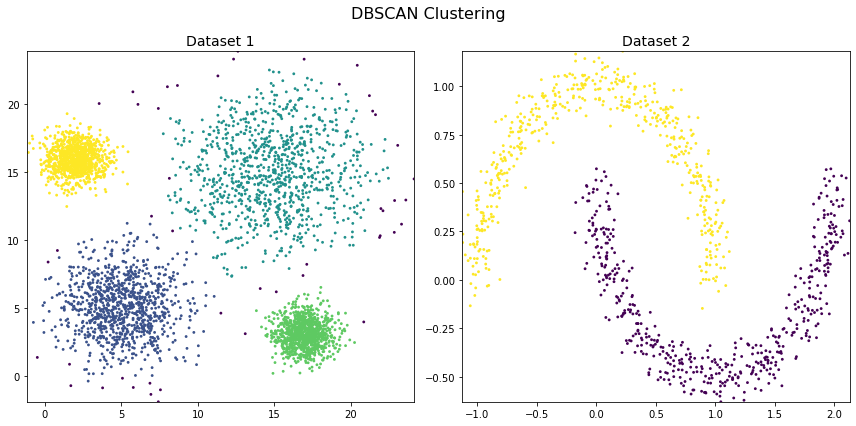

In [15]:
dbscan_dataset1 = cluster.DBSCAN(eps=1, min_samples=5, metric='euclidean').fit_predict(dataset1)
# noise points are assigned -1
print('Dataset1:')
print("Number of Noise Points: ",sum(dbscan_dataset1==-1)," (",len(dbscan_dataset1),")",sep='')

dbscan_dataset2 = cluster.DBSCAN(eps=0.2, min_samples=5, metric='euclidean').fit_predict(dataset2)
print('Dataset2:')
print("Number of Noise Points: ",sum(dbscan_dataset2==-1)," (",len(dbscan_dataset2),")",sep='')
cluster_plots(dataset1, dataset2, dbscan_dataset1, dbscan_dataset2, title_="DBSCAN Clustering")

Existen variantes de DBSCAN que intentan solventar estas falencias.

* GDBSCAN (Generalized DBSCAN): los parámetros ε y minPts son eliminados del algoritmo original y movidos a los predicados.

* OPTICS (Ordering Points To Identify the Clustering Structure): encuentra muestras centrales de alta densidad y expande clusters a partir de ellas. A diferencia de DBSCAN, mantiene la jerarquía de clusters para un radio de vecindario variable. Más adecuado para su uso en conjuntos de datos grandes que la implementación actual de DBSCAN en sklearn.

* HDBSCAN (Heirarchical DBSCAN): versión jerárquica de DBSCAN que también es más rápida que OPTICS, a partir de la cual se puede extraer una partición plana consistente en los clusters más prominentes de la jerarquía.